In [7]:
import tensorflow as tf
from tensorflow import keras

'2.4.0'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 5s 1us/step


In [9]:
X_train_full.shape


(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

In [14]:
X_train_full[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [15]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/250.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

y_train[:5]

array([4, 0, 7, 9, 9], dtype=uint8)

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Build a neural network

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.00996071,  0.06054951,  0.02135208, ...,  0.02008756,
        -0.03272373,  0.06730931],
       [-0.00520414, -0.01996642, -0.01893223, ..., -0.068275  ,
         0.06497546,  0.03567476],
       [-0.05842221,  0.0536496 , -0.01479867, ..., -0.05500537,
        -0.0540803 , -0.00134336],
       ...,
       [ 0.02537453, -0.05438293,  0.07175665, ...,  0.0470605 ,
         0.02865227,  0.00702286],
       [ 0.00834419,  0.04774516,  0.05629171, ..., -0.05113724,
        -0.04064343,  0.03635769],
       [-0.02752968,  0.0196605 ,  0.06991732, ..., -0.06488305,
        -0.04272357,  0.00227413]], dtype=float32)

In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [23]:
history = model.fit(X_train,y_train,epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7240 - accuracy: 0.7583 - val_loss: 0.5413 - val_accuracy: 0.8180
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4883 - accuracy: 0.8296 - val_loss: 0.4539 - val_accuracy: 0.8432
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4396 - accuracy: 0.8465 - val_loss: 0.4078 - val_accuracy: 0.8642
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4144 - accuracy: 0.8558 - val_loss: 0.4019 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3933 - accuracy: 0.8622 - val_loss: 0.3837 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3786 - accuracy: 0.8669 - val_loss: 0.3861 - val_accuracy: 0.8642
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3651 - accuracy: 0.8712 - val_loss: 0.3949 - val_accuracy:

<function matplotlib.pyplot.show(*args, **kw)>

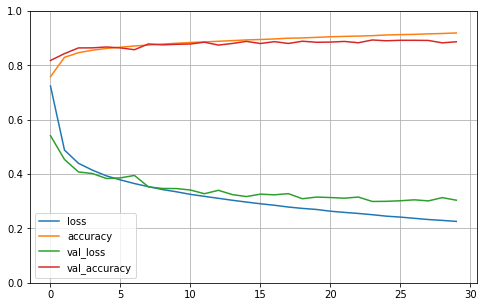

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [26]:
history = model.fit(X_train,y_train,epochs=40, validation_data=(X_valid,y_valid))

Epoch 1/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2218 - accuracy: 0.9204 - val_loss: 0.2987 - val_accuracy: 0.8938
Epoch 2/40
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2181 - accuracy: 0.9217 - val_loss: 0.2907 - val_accuracy: 0.8964
Epoch 3/40
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2151 - accuracy: 0.9210 - val_loss: 0.3051 - val_accuracy: 0.8882
Epoch 4/40
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2118 - accuracy: 0.9238 - val_loss: 0.3122 - val_accuracy: 0.8904
Epoch 5/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2085 - accuracy: 0.9245 - val_loss: 0.2906 - val_accuracy: 0.8944
Epoch 6/40
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2038 - accuracy: 0.9263 - val_loss: 0.2971 - val_accuracy: 0.8968
Epoch 7/40
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2016 - accuracy: 0.9281 - val_loss: 0.3212 - val_accuracy:

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3537 - accuracy: 0.8909


[0.3536958396434784, 0.8909000158309937]

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)